# EDA On Environmental & Financial Performance

# Import Essential Libraries

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [392]:
df = pd.read_csv(r"C:\Users\Aksha\Downloads\environmental and financial data.csv")

In [393]:
df.head(10)

,company,country,economic_sector,sub_industry,pollution,Total assets,Dividend,ROA,ROE,Direct emissions,Indirect emissions,quartile
0,ACCENTURE PLC,Ireland,Technology,IT Consulting & Other Services,non polluter,16992039,44.66,18.14,51.47,26290,237239,Medium
1,AIRBUS SE,Netherlands,Industrials,Aerospace & Defense,polluter,99922000,37.88,3.30,41.39,525883,401734,Huge
2,AKZO NOBEL N.V.,Netherlands,Basic Materials,Speciality Chemicals,polluter,14906000,39.24,7.19,15.95,1500000,2300000,Large
3,ALSTOM SA,France,Industrials,Construction Machinery & Heavy Transportation ...,polluter,32501000,0.00,-1.72,-15.67,54000,70000,Large
4,AP MOELLER MAERSK,Denmark,Industrials,Marine Transportation,polluter,422739287,NaN,1.62,2.15,33044000,415000,Huge
5,ARCELORMITTAL SA,Luxembourg,Basic Materials,Steel,polluter,64673541,0.00,-8.49,-26.24,176000000,16000000,Huge
6,BASF SE,Germany,Basic Materials,Diversified Chemicals,polluter,69045000,66.81,6.32,13.62,18375000,3795000,Huge
7,CAPGEMINI SE,France,Technology,IT Consulting & Other Services,non polluter,14819000,20.23,9.48,18.82,9621,230527,Medium
8,CARGOTEC CORP,Finland,Industrials,Industrial Machinery & Supplies & Components,polluter,3387200,36.20,4.63,11.22,8900,25500,Small
9,CORBION NV,Netherlands,Basic Materials,Speciality Chemicals,polluter,792100,65.82,10.85,15.65,91000,88000,Small


In [394]:
df.shape

(63, 12)

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company             63 non-null     object 
 1   country             63 non-null     object 
 2   economic_sector     63 non-null     object 
 3   sub_industry        63 non-null     object 
 4   pollution           63 non-null     object 
 5   Total assets        63 non-null     int64  
 6   Dividend            49 non-null     float64
 7   ROA                 63 non-null     float64
 8   ROE                 62 non-null     float64
 9   Direct emissions    63 non-null     int64  
 10  Indirect emissions  63 non-null     int64  
 11  quartile            63 non-null     object 
dtypes: float64(3), int64(3), object(6)
memory usage: 6.0+ KB


#### Since here we can see that the column ROE (Return On Equity) has 1 null value. Let's fill it by calculating the mean of other values

In [396]:
df["ROE"].fillna(df["ROE"].mean(), 
                 inplace = True)

#### Here we can see that since all non values are equal except for Dividend column. Our Data is now ready for exploration

In [397]:
# Let's check if the value has been filled or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company             63 non-null     object 
 1   country             63 non-null     object 
 2   economic_sector     63 non-null     object 
 3   sub_industry        63 non-null     object 
 4   pollution           63 non-null     object 
 5   Total assets        63 non-null     int64  
 6   Dividend            49 non-null     float64
 7   ROA                 63 non-null     float64
 8   ROE                 63 non-null     float64
 9   Direct emissions    63 non-null     int64  
 10  Indirect emissions  63 non-null     int64  
 11  quartile            63 non-null     object 
dtypes: float64(3), int64(3), object(6)
memory usage: 6.0+ KB


In [398]:
df.describe()

,Total assets,Dividend,ROA,ROE,Direct emissions,Indirect emissions
count,63.00,49.00,63.00,63.00,63.00,63.00
mean,30876491.22,36.79,4.20,8.21,8101643.25,1151689.57
std,61240002.84,24.62,6.85,21.76,24256759.30,2602476.22
min,792100.00,0.00,-19.28,-103.84,100.00,500.00
25%,6130223.00,20.23,1.74,2.88,51500.00,63898.50
50%,12115000.00,39.24,4.22,10.02,525883.00,260010.00
75%,29687600.00,51.93,7.40,17.05,3209490.00,1036117.00
max,422739287.00,80.79,20.46,59.56,176000000.00,16000000.00


# Sorting The Dataset

In [399]:
df.sort_values(by=["Total assets", "Direct emissions"], ascending=False, inplace=True)

In [400]:
df.reset_index(drop=True, inplace=True)
df.head(5)

,company,country,economic_sector,sub_industry,pollution,Total assets,Dividend,ROA,ROE,Direct emissions,Indirect emissions,quartile
0,AP MOELLER MAERSK,Denmark,Industrials,Marine Transportation,polluter,422739287,NaN,1.62,2.15,33044000,415000,Huge
1,TOTALENERG,France,Energy,Integrated Oil & Gas,polluter,203082342,NaN,2.58,5.77,42000000,4000000,Huge
2,ENI GROUP,Italy,Energy,Integrated Oil & Gas,polluter,130443000,NaN,-5.52,-15.75,42320000,620000,Huge
3,SIEMENS AG,Germany,Technology,Industrial Conglomerates,polluter,117757000,39.58,7.17,22.26,907000,1222000,Huge
4,AIRBUS SE,Netherlands,Industrials,Aerospace & Defense,polluter,99922000,37.88,3.30,41.39,525883,401734,Huge


# Renaming Columns For Better Readability 

In [401]:
df.rename(columns={"Direct emissions": "Direct emissions in tons", 
                   "Indirect emissions": "Indirect emissions in tons"}, inplace=True)

In [402]:
df['country'].unique()

array(['Denmark', 'France', 'Italy', 'Germany', 'Netherlands',
       'Luxembourg', 'Spain', 'Ireland', 'Austria', 'Finland', 'Greece'],
      dtype=object)

In [403]:
df.corr()

C:\Users\Aksha\AppData\Local\Temp\ipykernel_37504\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Total assets,Dividend,ROA,ROE,Direct emissions in tons,Indirect emissions in tons
Total assets,1.00,0.09,-0.11,-0.02,0.33,0.13
Dividend,0.09,1.00,0.48,0.49,-0.19,-0.08
ROA,-0.11,0.48,1.00,0.89,-0.29,-0.14
ROE,-0.02,0.49,0.89,1.00,-0.24,-0.12
Direct emissions in tons,0.33,-0.19,-0.29,-0.24,1.00,0.79
Indirect emissions in tons,0.13,-0.08,-0.14,-0.12,0.79,1.00


# Here's a brief explanation of the correlation matrix:

## Total assets:

Positive correlation with Direct emissions (0.33) and Indirect emissions (0.13), indicating that companies with higher total assets tend to have higher direct and indirect emissions.
Weak negative correlation with ROA (-0.11) and ROE (-0.02), suggesting that higher total assets might be associated with lower Return on Assets (ROA) and Return on Equity (ROE).

## Dividend:

Positive correlation with ROA (0.48) and ROE (0.49), implying that companies paying higher dividends tend to have higher Return on Assets (ROA) and Return on Equity (ROE).
Negative correlation with Direct emissions (-0.18) and Indirect emissions (-0.07), indicating that companies paying higher dividends tend to have lower direct and indirect emissions.

## ROA (Return on Assets):

Weak negative correlation with Total assets (-0.11) and Direct emissions (-0.29), suggesting that companies with higher Return on Assets (ROA) might have lower total assets and lower direct emissions.
Strong positive correlation with ROE (0.890356), indicating a strong positive relationship between Return on Assets (ROA) and Return on Equity (ROE).

## ROE (Return on Equity):

Weak negative correlation with Total assets (-0.02) and Direct emissions (-0.24), suggesting that companies with higher Return on Equity (ROE) might have lower total assets and lower direct emissions.
Strong positive correlation with ROA (0.89), indicating a strong positive relationship between Return on Equity (ROE) and Return on Assets (ROA).

## Direct emissions:

Positive correlation with Total assets (0.33) and Indirect emissions (0.79), suggesting that companies with higher direct emissions also tend to have higher total assets and higher indirect emissions.
Weak negative correlation with ROA (-0.29) and ROE (-0.24), implying that companies with higher direct emissions might have lower Return on Assets (ROA) and Return on Equity (ROE).

## Indirect emissions:

Positive correlation with Total assets (0.13) and Direct emissions (0.79), suggesting that companies with higher indirect emissions also tend to have higher total assets and higher direct emissions.
Weak negative correlation with ROA (-0.13) and ROE (-0.12), implying that companies with higher indirect emissions might have lower Return on Assets (ROA) and Return on Equity (ROE).

C:\Users\Aksha\AppData\Local\Temp\ipykernel_37504\207034926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


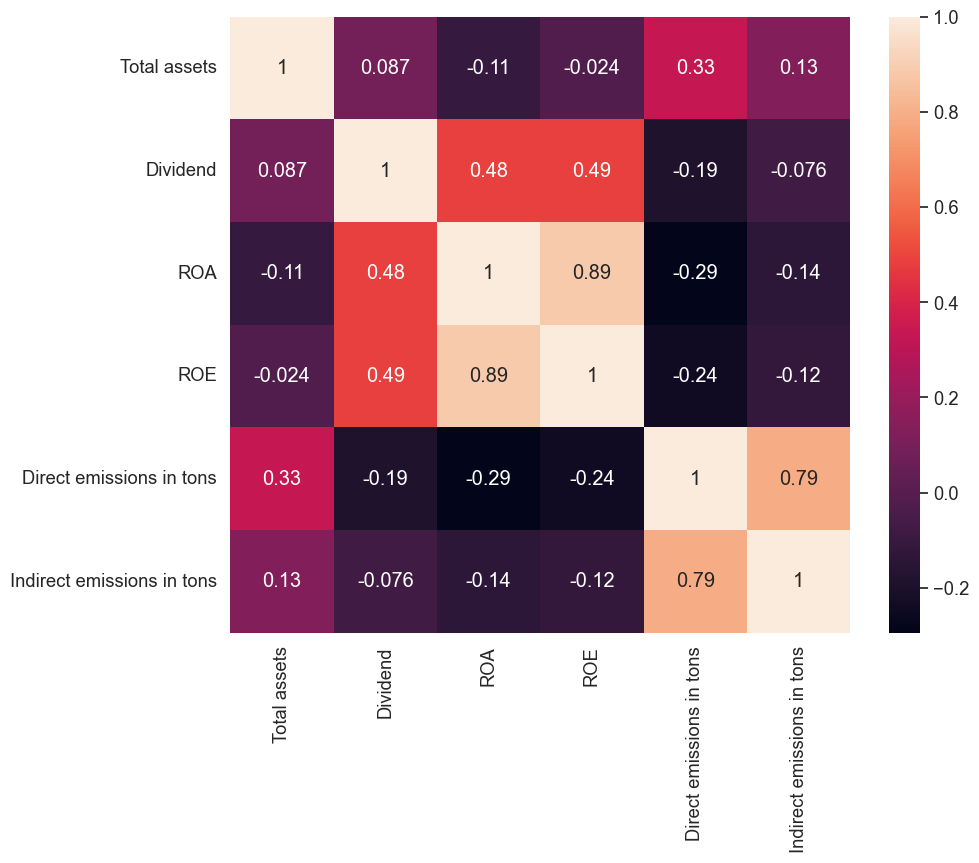

In [404]:
sns.heatmap(df.corr(), annot = True)
plt.rcParams['figure.figsize'] = (10,8)

# Group By Economic Sectors

In [405]:
df2=df.set_index(['economic_sector','company']).sort_index()

In [406]:
df2.sort_values(by="Total assets", ascending=False).sort_index()

country  \
economic_sector company                           
Basic Materials AKZO NOBEL N.V.     Netherlands   
                ARCELORMITTAL SA     Luxembourg   
                BASF SE                 Germany   
                CORBION NV          Netherlands   
                CRH PLC                 Ireland   
...                                         ...   
Technology      NOKIA OYJ               Finland   
                SEAGATE TECHNOLOGY      Ireland   
                SIEMENS AG              Germany   
                STMICROELECTRONICS  Netherlands   
                TIETOEVRY               Finland   

                                                                  sub_industry  \
economic_sector company                                                          
Basic Materials AKZO NOBEL N.V.                           Speciality Chemicals   
                ARCELORMITTAL SA                                         Steel   
                BASF SE                                  Diversified Chemicals   
                CORBION NV                                Speciality Chemicals   
                CRH PLC                                 Construction Materials   
...                                                                        ...   
Technology      NOKIA OYJ                             Communications Equipment   
                SEAGATE TECHNOLOGY  Technology Hardware, Storage & Peripherals   
                SIEMENS AG                            Industrial Conglomerates   
                STMICROELECTRONICS                              Semiconductors   
                TIETOEVRY                       IT Consulting & Other Services   

                                       pollution  Total assets  Dividend  \
economic_sector company                                                    
Basic Materials AKZO NOBEL N.V.         polluter      14906000     39.24   
                ARCELORMITTAL SA        polluter      64673541      0.00   
                BASF SE                 polluter      69045000     66.81   
                CORBION NV              polluter        792100     65.82   
                CRH PLC                 polluter      31858000     70.12   
...                                          ...           ...       ...   
Technology      NOKIA OYJ           non polluter      18292000     38.70   
                SEAGATE TECHNOLOGY  non polluter       9349000       NaN   
                SIEMENS AG              polluter     117757000     39.58   
                STMICROELECTRONICS      polluter       7833105       NaN   
                TIETOEVRY           non polluter       1054700       NaN   

                                     ROA    ROE  Direct emissions in tons  \
economic_sector company                                                     
Basic Materials AKZO NOBEL N.V.     7.19  15.95                   1500000   
                ARCELORMITTAL SA   -8.49 -26.24                 176000000   
                BASF SE             6.32  13.62                  18375000   
                CORBION NV         10.85  15.65                     91000   
                CRH PLC             3.57   6.24                  19700000   
...                                  ...    ...                       ...   
Technology      NOKIA OYJ          14.05  25.80                     18500   
                SEAGATE TECHNOLOGY 20.46  59.56                    302387   
                SIEMENS AG          7.17  22.26                    907000   
                STMICROELECTRONICS  2.43   3.31                    575000   
                TIETOEVRY           9.09  18.97                       100   

                                    Indirect emissions in tons quartile  
economic_sector company                                                  
Basic Materials AKZO NOBEL N.V.                        2300000    Large  
                ARCELORMITTAL SA                      16000000     Huge  
                BASF S

# Calculating Average Pollution By Economic Sector

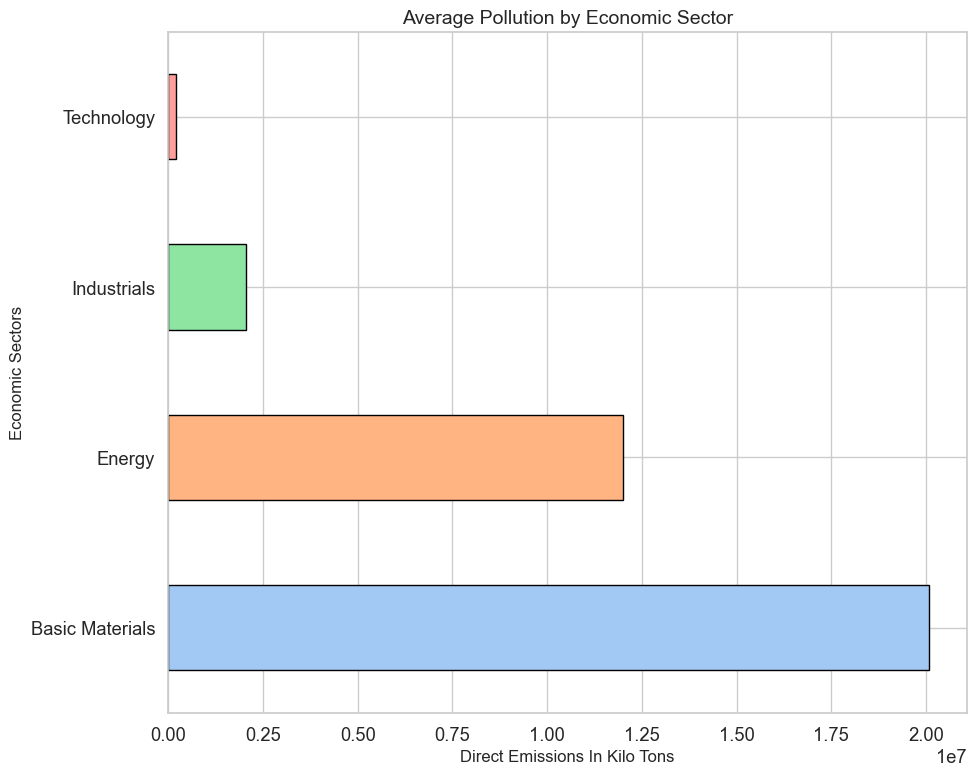

In [408]:
sns.set_style("whitegrid")

plt.figure(figsize=(10,8))
avg_pollution.plot(kind='barh', color=sns.color_palette("pastel"), 
                   edgecolor='black')

plt.xlabel('Direct Emissions In Kilo Tons', fontsize=12)
plt.ylabel('Economic Sectors', fontsize=12)
plt.title('Average Pollution by Economic Sector', fontsize=14)

plt.tight_layout()
plt.show()

# Finding Top 10 Companies By Dividend

C:\Users\Aksha\AppData\Local\Temp\ipykernel_37504\774075632.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df2['company'], rotation=45, ha='right', fontsize=14)


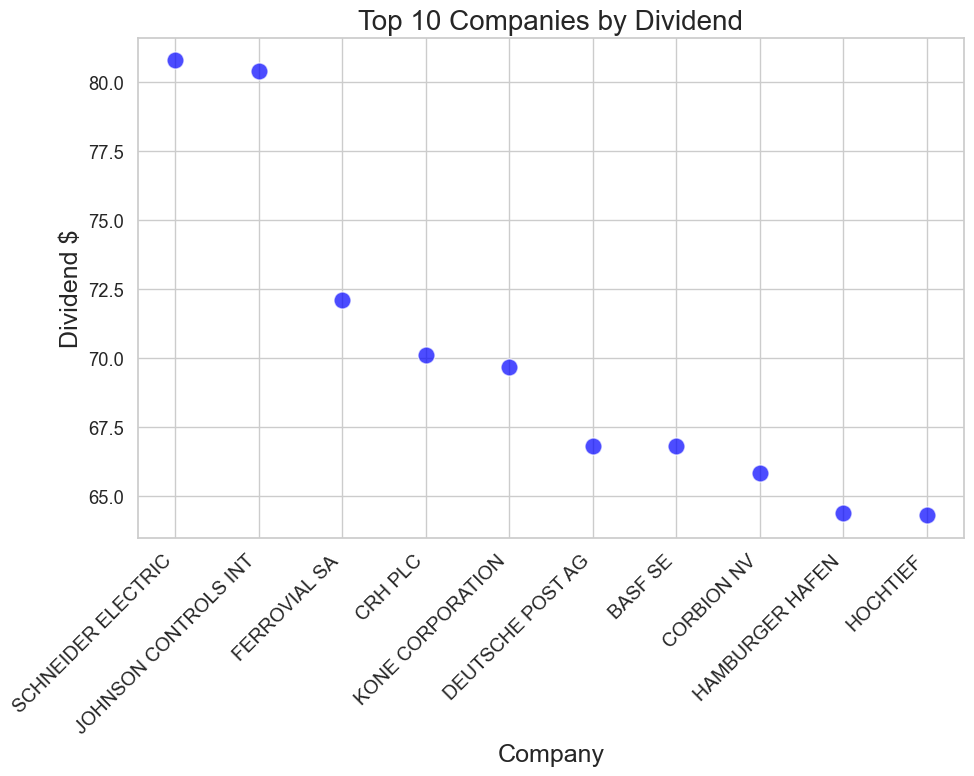

In [390]:
sns.set_style("whitegrid")
df2 = df.sort_values(by='Dividend', ascending=False).head(10)
sns.set(style='whitegrid', font_scale=1.2)

plt.figure(figsize=(10, 8))
ax = sns.scatterplot(data=df2, x='company', y='Dividend', color='blue',
                     alpha=0.7, s=150)

ax.set_xlabel('Company', fontsize=18)
ax.set_ylabel('Dividend $', fontsize=18)
ax.set_title('Top 10 Companies by Dividend', fontsize=20)

ax.set_xticklabels(df2['company'], rotation=45, ha='right', fontsize=14)

plt.tight_layout()
plt.show()